# Internet Advertisements Data Set

### Student: Rodolfo Lerma

## Data Set Information:

This dataset represents a set of possible advertisements on Internet pages. The features encode the geometry of the image (if available) as well as phrases occuring in the URL, the image's URL and alt text, the anchor text, and words occuring near the anchor text. The task is to predict whether an image is an advertisement ("ad") or not ("nonad"). Additional information can be found [here](https://archive.ics.uci.edu/ml/datasets/internet%2Badvertisements).

## Attribute Information:

The dataset has 3 continous (height, width, aratio) and 1555 binary (urls, tags, captions) features. 

## Source:

Creator & donor: Nicholas Kushmerick <nick '@' ucd.ie>

# Learning Objectives
- Identify and impute missing data
- Use normalization as part of the modeling process: min max normalization.
- Use normalization as part of the modeling process: centering and scaling.
- Use hold-out validation to compare the performance of a pair of models using a large data set.

In [1]:
import pandas as pd
import numpy as np

# Load the data
internetAd = pd.read_csv('Internet_Ad_Data.csv', sep=',', error_bad_lines=False)
print(internetAd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, height to Target
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB
None


C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
internetAd.head(20)

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [3]:
internetAd.shape

(3279, 1559)

In [4]:
internetAd.dtypes

height                       object
width                        object
aratio                       object
local                        object
url*images+buttons            int64
url*likesbooks.com            int64
url*www.slake.com             int64
url*hydrogeologist            int64
url*oso                       int64
url*media                     int64
url*peace+images              int64
url*blipverts                 int64
url*tkaine+kats               int64
url*labyrinth                 int64
url*advertising+blipverts     int64
url*images+oso                int64
url*area51+corridor           int64
url*ran+gifs                  int64
url*express-scripts.com       int64
url*off                       int64
url*cnet                      int64
url*time+1998                 int64
url*josefina3                 int64
url*truluck.com               int64
url*clawnext+gif              int64
url*autopen.com               int64
url*tvgen.com                 int64
url*pixs                    

### Question 1.1: Replace all the values of '   ?' with nan. And replace ad. with 1 and nonad. with 0

In [5]:
import numpy as np
#Replace "?" values for nan
options = ["?"," ?" ," ? ","   ?", "     ?", "      ?","       ?","     ?  ","     ?   "]
for i in options:
    internetAd.replace(i, np.nan, inplace=True)

In [6]:
#Convert values to numeric
sample_columns = ['height', 'width', 'aratio', 'local']
for i in sample_columns:
    internetAd[i] = pd.to_numeric(internetAd[i]) 

In [7]:
internetAd.replace(to_replace = ['ad.','nonad.'], value = [1,0], inplace = True)

### Question 1.1 Part 2: Check that replacing worked

In [8]:
#Checking if the values were in fact replace
internetAd.head(15)

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125.0,125.0,1.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,57.0,468.0,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,59.0,460.0,7.7966,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,60.0,234.0,3.9000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


We can see that the replacement worked.

### Make Sure that "height","width","aratio" is type - float

In [9]:
internetAd.dtypes.head(10)

height                float64
width                 float64
aratio                float64
local                 float64
url*images+buttons      int64
url*likesbooks.com      int64
url*www.slake.com       int64
url*hydrogeologist      int64
url*oso                 int64
url*media               int64
dtype: object

In [10]:
internetAd.dtypes.tail(10)

caption*home     int64
caption*my       int64
caption*your     int64
caption*in       int64
caption*bytes    int64
caption*here     int64
caption*click    int64
caption*for      int64
caption*you      int64
Target           int64
dtype: object

It is possible to see that the columns where initially had the string value "?" now are float64 datatype, which indicates that we do not have strings anymore.

### Question 1.2: Describe the statistics for each of the columns ["height","width","aratio","local"] 

In [11]:
internetAd[sample_columns].describe()

,height,width,aratio,local
count,2376.000000,2378.000000,2369.000000,3264.000000
mean,64.021886,155.344828,3.911953,0.767157
std,54.868604,130.032350,6.042986,0.422708
min,1.000000,1.000000,0.001500,0.000000
25%,25.000000,80.000000,1.035700,1.000000
50%,51.000000,110.000000,2.102000,1.000000
75%,85.250000,184.000000,5.333300,1.000000
max,640.000000,640.000000,60.000000,1.000000


### Question 2.1: Caluclate and display the (mean, median, mode) for each of the columns ["height","width","aratio","local"] as well as the overall statistics using describe method.

In [12]:
#Mean
mean_list = []
for i in sample_columns:
    mean = np.mean(internetAd[i])
    mean_list.append(mean)
    
mean_dic = {sample_columns[i]: mean_list[i] for i in range(len(mean_list))}
mean_df = pd.DataFrame.from_dict(mean_dic, orient='index').rename(columns={0: 'Mean'})
mean_df

,Mean
height,64.021886
width,155.344828
aratio,3.911953
local,0.767157


In [13]:
#Median
median_list = []
for i in sample_columns:
    median = internetAd[i].median()
    median_list.append(median)
    
median_dic = {sample_columns[i]: median_list[i] for i in range(len(median_list))}
median_df = pd.DataFrame.from_dict(median_dic, orient='index').rename(columns={0: 'Median'})
median_df

,Median
height,51.000
width,110.000
aratio,2.102
local,1.000


In [14]:
#Mode
import statistics as st
mode_list = []
for i in sample_columns:
    mode = st.mode(internetAd[i])
    mode_list.append(mode)
    
mode_dic = {sample_columns[i]: mode_list[i] for i in range(len(mode_list))}
mode_df = pd.DataFrame.from_dict(mode_dic, orient='index').rename(columns={0: 'Mode'})
mode_df

,Mode
height,60.0
width,468.0
aratio,1.0
local,1.0


### Question 2.2: Replace nan values for each of the ["height","width","aratio","local"] with the respective median value

In [15]:
for i in sample_columns:
    internetAd[i].fillna(internetAd[i].median(), inplace=True)

### Question 3.1: Plot the distribution of each of ["height","width","aratio","local"]

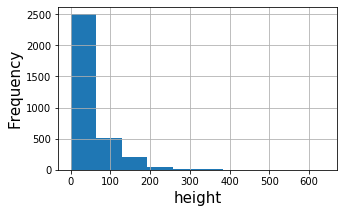

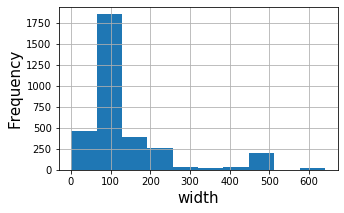

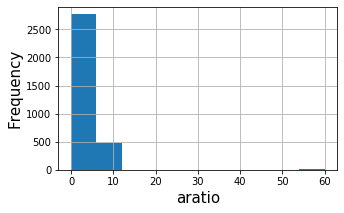

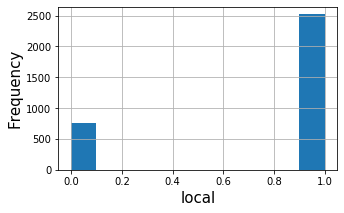

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def hist_plot(df,a):
    df[a].hist(figsize = (5,3))
    plt.xlabel(a, fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.tick_params(axis="x", labelsize=10)
    plt.tick_params(axis="y", labelsize=10)
    plt.grid(True)
    plt.show()

for i in sample_columns:
    hist_plot(internetAd, i)

### Question 3.2: You have noticed the wide variation across the different features. As a result, let's normalize the features using [MinMaxScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) method. Before we do that, we need to split the data into training and testing.

In [17]:
from sklearn.model_selection import train_test_split

columns_no_target = internetAd.columns.to_list()
columns_no_target.remove('Target')
X = internetAd[columns_no_target]
y = internetAd['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_minmax_scaled = #fill this in
X_test_minmax_scaled = #fill this in

SyntaxError: invalid syntax (<ipython-input-18-9019f8cfda08>, line 5)

### Question 3.3: Lets build another training set where features are normalized using [StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [ ]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
X_train_minmax_scaled = X_train.copy()
X_test_minmax_scaled = X_test.copy()

#fill this in

### Question 4.1: Apply [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to the above minmax scaled dataset with class_weight='balanced', solver='saga', and max_iter=1000. Calculate Accuracy, Confusion Matrix, Precision, and Recall.


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


### Question 4.2: Repeat question 4.1 setting penalty to {‘l1’,'l2', ‘elasticnet’}. 
- Set C=0.1 for l1.
- Set l1_ratio=0.5 for elasticnet.

In [ ]:
#penalty='l1'

In [ ]:
#penalty='elasticnet'


### Question 5: How do the three models compare? How did you make the comparison?

### Question 6: Repeat steps 4.1-4.3 with the standard scaled dataset